<a href="https://colab.research.google.com/github/irshad9873/kinara/blob/main/Irshad_khan_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Description**

Build a single dataset from the various tables in the database. Please do this in the notebook and show the queries you used. The idea here is to demonstrate your ability to write SQL code, rather than your ability to use Pandas or R to read in the different tables and merge. So, write SQL queries to do the merging.

Clean the dataset as required. A couple of hints: (1) you can infer the label of an observation based on the existence of an account number. (2) Categorize cibil scores. (3) Create a variable called collateral which takes the values secured or unsecured depending on whether the product type is secured or not (see the dictionary). (4) Deal with missing values. Explain what approaches you took.

Conduct Exploratory Analysis and generate hypotheses. (1) You should be able to show the distribution using density plots or box plots of all the quantitative variables and histograms for the qualitative ones. (2) Explore the relationship between individual features and the label. This should take the form of scatter plots or bar charts, etc. (3) Are the bivariate relationships statistically significant? How do you know? (4) What hypotheses would you formulate from this analysis.

Build a model with the few features you have to predict the label. Explain which features you used and why Explain which algorithm you chose to use and why. Is your model any good? How do you know?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymysql
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
def sql(query:'Write the query here .'):
    '''
    This function fetches data from database and returns the result.
    '''
    try:
        engine_db = create_engine('sqlite:///////content/kinara_assessment_20190807.db', poolclass=NullPool )
        conn = engine_db.connect()
        # Reading Data
        df = pd.read_sql_query(query, conn)

        #if your connection object is named conn
        if not conn.closed:
            conn.close()
        engine_db.dispose()
        return df
    except Exception as e:
        print(e)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.1 MB/s 


In [ ]:
import seaborn as sns

In [ ]:
from matplotlib import pyplot as plt

('loan_information',)
('enterprise_information',)
('scores_information',)
('disbursement_information',)

In [ ]:
#load loan infromation data
sql('''select * from loan_information
limit 3''')

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id
0,29321,None,71846,24500.0,2018-04-19,None,53
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39
2,13921,None,31928,11002.0,2017-08-17,None,56


In [ ]:
sql(''' select * from scores_information ''')

,loan_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP
0,29321,27.0,None,776.0
1,13613,30.0,Invoice & Banked,616.0
2,13921,55.0,None,793.0
3,16520,26.0,None,781.0
4,49742,30.0,Cash & Non Banked,689.0
...,...,...,...,...
2471,15639,49.0,Cash & Non Banked,536.0
2472,14122,43.0,Cash & Non Banked,760.0
2473,3420,28.0,Invoice & Banked,802.0
2474,42491,53.0,Invoice & Banked,773.0


In [ ]:

sql('''select * from disbursement_information limit 10 ''')

,account_number,total_disbursement_amount,disbursement_month
0,None,NaN,None
1,TLWCU0003070,400000.0,Aug-2017
2,None,NaN,None
3,None,NaN,None
4,TLWCS0012623,500000.0,Jan-2019
5,None,NaN,None
6,TLWCS0016745,400000.0,Jun-2019
7,TLWCS0002705,500000.0,Dec-2017
8,None,NaN,None
9,None,NaN,None


In [ ]:
#Merge all the tables by using sql
df = sql('''select * from loan_information
left join enterprise_information using (loan_id)
left join scores_information using(loan_id)
left join disbursement_information using(account_number)
 ''')

**This is the final Data after merging all the four tables**

In [ ]:
# data after merging four data
df

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,enterprise_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,24500.0,27.0,None,776.0,NaN,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,10723.0,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,11002.0,55.0,None,793.0,NaN,None
3,16520,None,38660,13220.0,2017-10-21,None,58,None,Retail,Food & Beverage,13220.0,26.0,None,781.0,NaN,None
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,40426.0,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,15639,None,36377,12454.0,2017-09-23,None,42,None,Job Work & Sales,Wood,12454.0,49.0,Cash & Non Banked,536.0,NaN,None
2472,14122,TLWCS0001490,32442,11166.0,2017-08-21,TLWCS,40,Manufacturing,Job Work,Auto Components,11166.0,43.0,Cash & Non Banked,760.0,150000.0,Aug-2017
2473,3420,0007LTL1004271,10054,3489.0,None,TLWCS,15,Manufacturing,Job Work,Auto Components,3489.0,28.0,Invoice & Banked,802.0,500000.0,Sep-2016
2474,42491,TLWCU0010873,102464,34711.0,2018-10-15,TLWCU,32,Manufacturing,Sales,Fabrication,34711.0,53.0,Invoice & Banked,773.0,500000.0,Oct-2018


**Check the shape of the data**

In [ ]:
#check shape of the data
df.shape

(2476, 16)

In [ ]:
#check null values
df.isnull().sum()

loan_id                             0
account_number                   1107
customer_id                         0
enterprise_id                       1
screening_date                    126
product_code                     1058
hub_id                              0
business_type                     463
business_activity                   1
business_sector                     1
enterprise_id                       1
ManagAgeui_APP                      3
BusinFormalityOfTheBusinessui     488
ManagCBscoreui_APP                  3
total_disbursement_amount        1107
disbursement_month               1107
dtype: int64

# **Label of an observation based on the existence of an account number.**

In [ ]:
# Build a new column 
df['lable'] = df['account_number'].apply(lambda x : 0 if x == None else 1)
df.head(3)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,enterprise_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,lable
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,24500.0,27.0,None,776.0,NaN,None,0
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,10723.0,30.0,Invoice & Banked,616.0,400000.0,Aug-2017,1
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,11002.0,55.0,None,793.0,NaN,None,0


# **Categorize cibil scores.**

0=LESS THEN 650

1=MORE THAN OR EQUAL TO 650 

In [ ]:
# change the cibil score as 0 and 1
df['ManagCBscoreui_APP'] = df['ManagCBscoreui_APP'].apply(lambda x : 0 if x <650 else 1)
df.head(3)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,enterprise_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,lable
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,24500.0,27.0,None,1,NaN,None,0
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,10723.0,30.0,Invoice & Banked,0,400000.0,Aug-2017,1
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,11002.0,55.0,None,1,NaN,None,0


**Now Create a variable called collateral which takes the values secured or unsecured depending on whether the product type is secured or not**

In [ ]:
# Make a new column from product code
df['collateral'] = df['product_code'].str[-1:]
df['collateral'] = df['collateral'].replace(['S'],'secured')
df['collateral'] = df['collateral'].replace(['U'],'unsecured')
df.head(3)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,enterprise_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,lable,collateral
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,24500.0,27.0,None,1,NaN,None,0,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,10723.0,30.0,Invoice & Banked,0,400000.0,Aug-2017,1,unsecured
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,11002.0,55.0,None,1,NaN,None,0,None


**Check the data types**

In [ ]:
#check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_id                        2476 non-null   int64  
 1   account_number                 1369 non-null   object 
 2   customer_id                    2476 non-null   int64  
 3   enterprise_id                  2475 non-null   float64
 4   screening_date                 2350 non-null   object 
 5   product_code                   1418 non-null   object 
 6   hub_id                         2476 non-null   int64  
 7   business_type                  2013 non-null   object 
 8   business_activity              2475 non-null   object 
 9   business_sector                2475 non-null   object 
 10  enterprise_id                  2475 non-null   float64
 11  ManagAgeui_APP                 2473 non-null   float64
 12  BusinFormalityOfTheBusinessui  1988 non-null   o

In [ ]:
#check the data description
df.describe()

,loan_id,customer_id,enterprise_id,hub_id,enterprise_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount,lable
count,2476.000000,2476.000000,2475.000000,2476.000000,2475.000000,2473.000000,2476.000000,1.369000e+03,2476.000000
mean,34771.864701,70758.806947,23959.273939,43.886511,23959.273939,38.264860,0.647415,3.702370e+05,0.552908
std,17263.360009,42834.934930,14534.358561,24.709423,14534.358561,8.663885,0.477871,3.084137e+05,0.497293
min,304.000000,6597.000000,32.000000,3.000000,32.000000,20.000000,0.000000,7.000000e+04,0.000000
25%,20910.250000,30589.750000,10590.500000,24.000000,10590.500000,32.000000,0.000000,2.000000e+05,0.000000
50%,34944.500000,70246.000000,23960.000000,40.000000,23960.000000,37.000000,1.000000,3.000000e+05,1.000000
75%,49721.000000,107932.500000,36499.500000,61.000000,36499.500000,44.000000,1.000000,5.000000e+05,1.000000
max,65573.000000,150487.000000,50761.000000,99.000000,50761.000000,69.000000,1.000000,3.500000e+06,1.000000


In [ ]:
#check the null values
df.isnull().sum()

loan_id                             0
account_number                   1107
customer_id                         0
enterprise_id                       1
screening_date                    126
product_code                     1058
hub_id                              0
business_type                     463
business_activity                   1
business_sector                     1
enterprise_id                       1
ManagAgeui_APP                      3
BusinFormalityOfTheBusinessui     488
ManagCBscoreui_APP                  0
total_disbursement_amount        1107
disbursement_month               1107
lable                               0
collateral                       1058
dtype: int64

**There is huge number of null values present in the data so we can't drop the columns directly. So we have to treat all the missing values**

In [ ]:
#Fill null values with zero in the total disbursement amount
df['total_disbursement_amount'] = df['total_disbursement_amount'].fillna(0)


In [ ]:
#check the dataset 
df.head(5)

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,enterprise_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,24500.0,27.0,None,776.0,0.0,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,10723.0,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,11002.0,55.0,None,793.0,0.0,None
3,16520,None,38660,13220.0,2017-10-21,None,58,None,Retail,Food & Beverage,13220.0,26.0,None,781.0,0.0,None
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,40426.0,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019


In [ ]:
#check the null values
df.isnull().sum()


loan_id                             0
account_number                   1107
customer_id                         0
enterprise_id                       1
screening_date                    126
product_code                     1058
hub_id                              0
business_type                     463
business_activity                   1
business_sector                     1
enterprise_id                       1
ManagAgeui_APP                      3
BusinFormalityOfTheBusinessui     488
ManagCBscoreui_APP                  0
total_disbursement_amount           0
disbursement_month               1107
lable                               0
collateral                       1058
dtype: int64

In [ ]:
#fill null values in the business_type with the other column by making he dictonary
df.groupby('business_type')['business_activity'].value_counts()
business_dict = {
    'Sales': 'Manufacturing', 
    'Job Work': 'Manufacturing', 
    'Job Work & Sales': 'Manufacturing',
    'Retail' : 'Trading',
    'Whole Sale' : 'Trading',
    'Retail (Business to Customer)' : 'Services',
    'Retail (Business to Business)' : 'Services'
}

df['business_type'] = df['business_activity'].map(business_dict)

In [ ]:
# now drop the null values present in the screening date
df.dropna(subset=['screening_date'],inplace=True)

In [ ]:
df

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,enterprise_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,lable,collateral
0,29321,None,71846,24500.0,2018-04-19,None,53,Manufacturing,Job Work,Machine Components,24500.0,27.0,None,1,300000,None,0,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,10723.0,30.0,Invoice & Banked,0,400000,Aug-2017,1,unsecured
2,13921,None,31928,11002.0,2017-08-17,None,56,Trading,Retail,Agriculture,11002.0,55.0,None,1,300000,None,0,None
3,16520,None,38660,13220.0,2017-10-21,None,58,Trading,Retail,Food & Beverage,13220.0,26.0,None,1,300000,None,0,None
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,40426.0,30.0,Cash & Non Banked,1,500000,Jan-2019,1,secured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,13462,None,7058,493.0,2017-08-07,None,42,Manufacturing,Job Work & Sales,Plastics,493.0,39.0,None,0,300000,None,0,None
2471,15639,None,36377,12454.0,2017-09-23,None,42,Manufacturing,Job Work & Sales,Wood,12454.0,49.0,Cash & Non Banked,0,300000,None,0,None
2472,14122,TLWCS0001490,32442,11166.0,2017-08-21,TLWCS,40,Manufacturing,Job Work,Auto Components,11166.0,43.0,Cash & Non Banked,1,150000,Aug-2017,1,secured
2474,42491,TLWCU0010873,102464,34711.0,2018-10-15,TLWCU,32,Manufacturing,Sales,Fabrication,34711.0,53.0,Invoice & Banked,1,500000,Oct-2018,1,unsecured


**Fetch the all int and float columns in a list**

In [ ]:
#find all the numerical features from the data and store into a list
numerical_features=list(df.select_dtypes(['int','float']).columns)
numerical_features=pd.Index(numerical_features)
numerical_features

Index(['loan_id', 'customer_id', 'enterprise_id', 'hub_id', 'enterprise_id',
       'ManagAgeui_APP', 'ManagCBscoreui_APP', 'total_disbursement_amount',
       'lable'],
      dtype='object')

**Fetch the all category and object columns in a list**

In [ ]:
#find all the categorical features from the data and store into a list
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['account_number', 'screening_date', 'product_code', 'business_type',
       'business_activity', 'business_sector', 'BusinFormalityOfTheBusinessui',
       'disbursement_month', 'collateral'],
      dtype='object')

**Fetch day,year and month from screening date**

In [ ]:
#convert screening date into month , year and date
df['screening_date'] = pd.to_datetime(df['screening_date'])
df['screening_month']=df['screening_date'].dt.month
df['screening_day'] = df['screening_date'].dt.day
df['screening_year']=df['screening_date'].dt.year

**One hot encoding on collateral**

In [ ]:
#now one hot encoading on a collateral column and it also use for remove outliers
df=pd.get_dummies(df, columns = ['collateral'])

In [ ]:
#check the dataset
df

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,...,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month,lable,screening_month,screening_day,screening_year,collateral_secured,collateral_unsecured
0,29321,None,71846,24500.0,2018-04-19,None,53,Manufacturing,Job Work,Machine Components,...,None,1,300000,None,0,4,19,2018,0,0
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,...,Invoice & Banked,0,400000,Aug-2017,1,8,10,2017,0,1
2,13921,None,31928,11002.0,2017-08-17,None,56,Trading,Retail,Agriculture,...,None,1,300000,None,0,8,17,2017,0,0
3,16520,None,38660,13220.0,2017-10-21,None,58,Trading,Retail,Food & Beverage,...,None,1,300000,None,0,10,21,2017,0,0
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,...,Cash & Non Banked,1,500000,Jan-2019,1,12,24,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,13462,None,7058,493.0,2017-08-07,None,42,Manufacturing,Job Work & Sales,Plastics,...,None,0,300000,None,0,8,7,2017,0,0
2471,15639,None,36377,12454.0,2017-09-23,None,42,Manufacturing,Job Work & Sales,Wood,...,Cash & Non Banked,0,300000,None,0,9,23,2017,0,0
2472,14122,TLWCS0001490,32442,11166.0,2017-08-21,TLWCS,40,Manufacturing,Job Work,Auto Components,...,Cash & Non Banked,1,150000,Aug-2017,1,8,21,2017,1,0
2474,42491,TLWCU0010873,102464,34711.0,2018-10-15,TLWCU,32,Manufacturing,Sales,Fabrication,...,Invoice & Banked,1,500000,Oct-2018,1,10,15,2018,0,1


In [ ]:
#import lableencode 
from sklearn.preprocessing import LabelEncoder

**Lable encoding on some features**

In [ ]:
#apply lable encoading on some features of the data set
df1=df[['business_type', 'business_activity', 'business_sector','BusinFormalityOfTheBusinessui']] = df[['business_type', 'business_activity', 'business_sector','BusinFormalityOfTheBusinessui']].apply(LabelEncoder().fit_transform)

In [ ]:
#drop one column BusinFormalityOfTheBusinessui from the data set
df1 =df1.drop(['BusinFormalityOfTheBusinessui'], axis=1)

In [ ]:
#drop three more feature business_type,business_activity,business_sector from the same dataset
df =df.drop(['business_type','business_activity','business_sector'], axis=1)

**Finally merge the two data and make a final data for doing EDA**

In [ ]:
#merge two data set df and df1
result = pd.concat([df, df1], axis=1, join="inner")

In [ ]:
#finally drop some feature from the final dataset 
result =result.drop(['loan_id','account_number','customer_id','enterprise_id','screening_date','product_code','hub_id'], axis=1)

In [ ]:
# drop disbursement_month from the dataset
result =result.drop(['disbursement_month'], axis=1)

In [ ]:
#drop null values in the age columns
result.dropna(subset=['ManagAgeui_APP'],inplace=True)

In [ ]:
#change the type of the column ManagAgeui_APP
result['ManagAgeui_APP']=result['ManagAgeui_APP'].astype(int)

In [ ]:
#check the result dataset
result

,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,lable,screening_month,screening_day,screening_year,collateral_secured,collateral_unsecured,business_type,business_activity,business_sector
0,27,4,1,300000,0,4,19,2018,0,0,0,0,27
1,30,2,0,400000,1,8,10,2017,0,1,2,2,12
2,55,4,1,300000,0,8,17,2017,0,0,2,2,0
3,26,4,1,300000,0,10,21,2017,0,0,2,2,15
4,30,1,1,500000,1,12,24,2018,1,0,0,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,39,4,0,300000,0,8,7,2017,0,0,0,1,32
2471,49,1,0,300000,0,9,23,2017,0,0,0,1,36
2472,43,1,1,150000,1,8,21,2017,1,0,0,0,2
2474,53,2,1,500000,1,10,15,2018,0,1,0,5,13


# **Check and remove the outlier**

In [ ]:
#check the outlier of the data set
num_var = result.select_dtypes(exclude='object')
for i in num_var:
    
    q1 = result[i].quantile(0.25)
    q3 = result[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(result.shape[0] - result[(result[i]<UL) & (result[i]>LL)].shape[0]))
    print(' ')

IQR of ManagAgeui_APP =  12.0
UL of ManagAgeui_APP =  62.0
LL of ManagAgeui_APP =  14.0
Number of Outliers in ManagAgeui_APP  =  23
 
IQR of BusinFormalityOfTheBusinessui =  2.0
UL of BusinFormalityOfTheBusinessui =  6.0
LL of BusinFormalityOfTheBusinessui =  -2.0
Number of Outliers in BusinFormalityOfTheBusinessui  =  0
 
IQR of ManagCBscoreui_APP =  1.0
UL of ManagCBscoreui_APP =  2.5
LL of ManagCBscoreui_APP =  -1.5
Number of Outliers in ManagCBscoreui_APP  =  0
 
IQR of total_disbursement_amount =  0.0
UL of total_disbursement_amount =  300000.0
LL of total_disbursement_amount =  300000.0
Number of Outliers in total_disbursement_amount  =  2348
 
IQR of lable =  1.0
UL of lable =  2.5
LL of lable =  -1.5
Number of Outliers in lable  =  0
 
IQR of screening_month =  7.0
UL of screening_month =  20.5
LL of screening_month =  -7.5
Number of Outliers in screening_month  =  0
 
IQR of screening_day =  13.0
UL of screening_day =  41.5
LL of screening_day =  -10.5
Number of Outliers in sc

In [ ]:
result.isnull().sum()

ManagAgeui_APP                   0
BusinFormalityOfTheBusinessui    0
ManagCBscoreui_APP               0
total_disbursement_amount        0
lable                            0
screening_month                  0
screening_day                    0
screening_year                   0
collateral_secured               0
collateral_unsecured             0
business_type                    0
business_activity                0
business_sector                  0
dtype: int64

**Exploratory Data Analysis**

**Why do we perform EDA?**

**An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.**

**Univariate Analysis**

**Why do you do univariate analysis?**

**The key objective of Univariate analysis is to simply describe the data to find patterns within the data**

**Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**

**we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.**

In [ ]:
#extract some features from the fianl dataset
num_feature=['ManagAgeui_APP','total_disbursement_amount','ManagCBscoreui_APP','lable']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


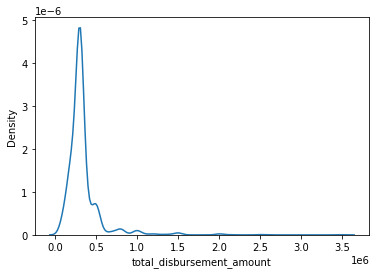

In [ ]:
#make a density plot of a total disbursement amount
sns.distplot(a=result.total_disbursement_amount, hist=False)

**In this graph we easily see that disbursed loan amount 300000 to 400000 given but above 500000 amount is given only very few customers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


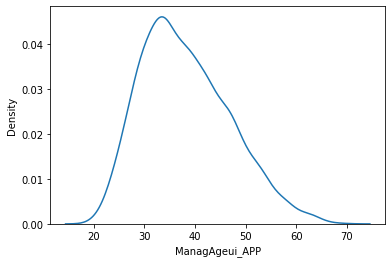

In [ ]:
#make a displot of a age column and check the distribution of age 
sns.distplot(a=result.ManagAgeui_APP, hist=False)

**Age between 30 to 40 years persons get the loan easily but above or below this range loan rejection rate is high**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


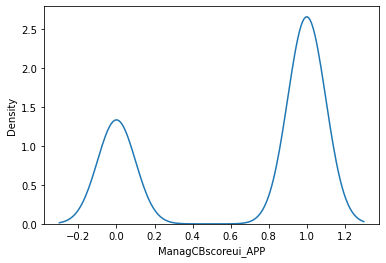

In [ ]:
#make a displot of a cibil score and check how many has good or bad cibil score rate
sns.distplot(a=result.ManagCBscoreui_APP, hist=False)

**0 means cibil score less than 650 and 1 means cibil score is greater than 650**

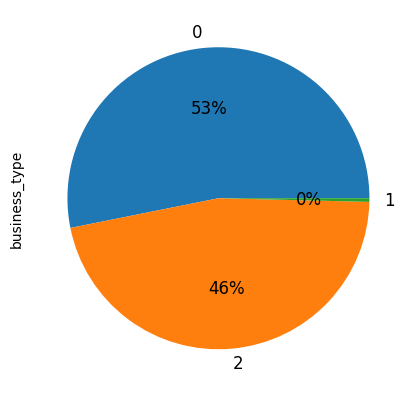

In [ ]:
#make a pie chart for a business type to check the distribution of business
fig = plt.figure(figsize=(5,5), dpi=100)
result['business_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=12)

0=Services

1=Manufacturing

2=Trading

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


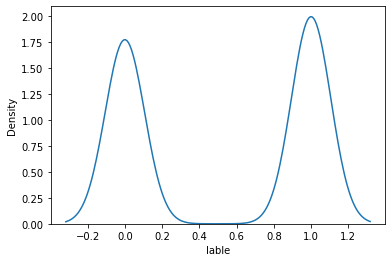

In [ ]:
#make a displot to check the distribution of the lable 
sns.distplot(a=result.lable, hist=False)

**0 means loan rejected and 1 means loan accepted**

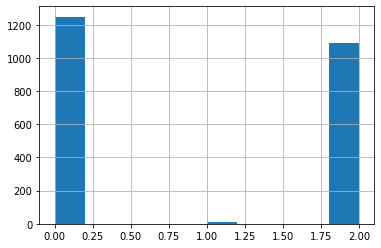

In [ ]:
#now plot a histogram for a business type
plot1=result["business_type"].hist()
plot1

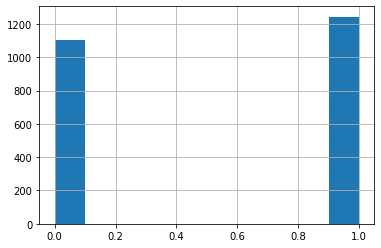

In [ ]:
#make a histogram to check the count the lable 
plot1=result["lable"].hist()
plot1

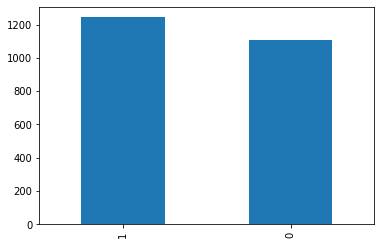

In [ ]:
#count lable
result.lable.value_counts().plot(kind = 'bar')

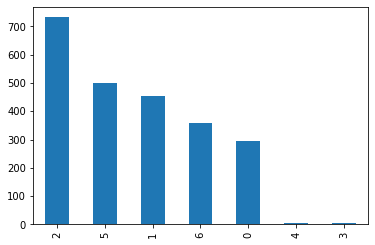

In [ ]:
# Plotting business_type on a Barplot for check the which business is most active

result.business_activity.value_counts().plot(kind = 'bar')

0=job work

1=job work and sales

2=retail

3=retail(business to business)

4=retail(business to customers)

5=sales

6=hole sale

# **Explore the relationship between individual features and the label**

In [ ]:
#extract some of the columns from the final dataset
num_feature=['ManagAgeui_APP','total_disbursement_amount','ManagCBscoreui_APP','lable']

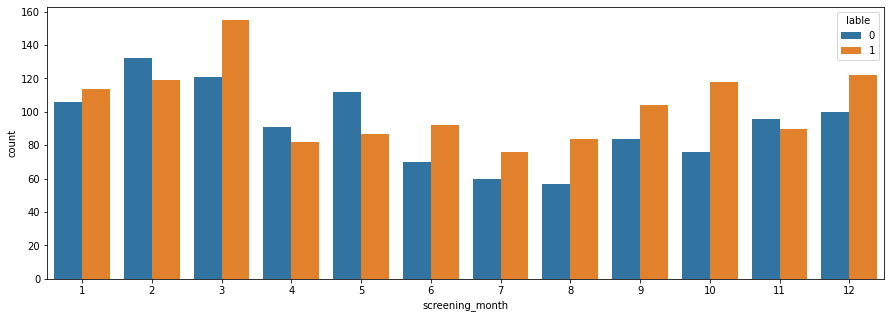

In [ ]:
#make a count plot for screening month to check the number of loan sanction by month 
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'screening_month', hue = 'lable')

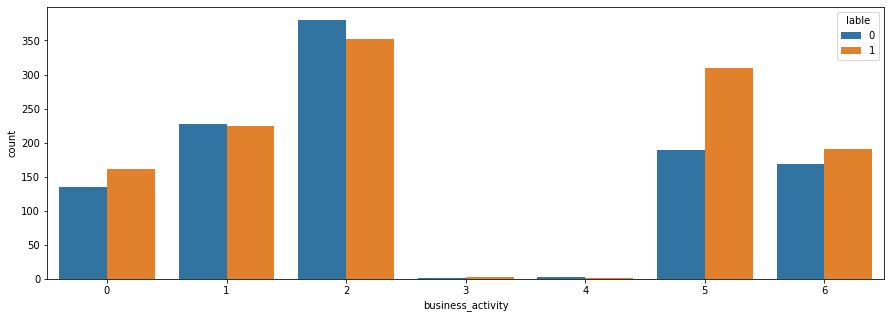

In [ ]:
#count plot for the  lable(loan sanction) and the business activity
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'business_activity', hue = 'lable')

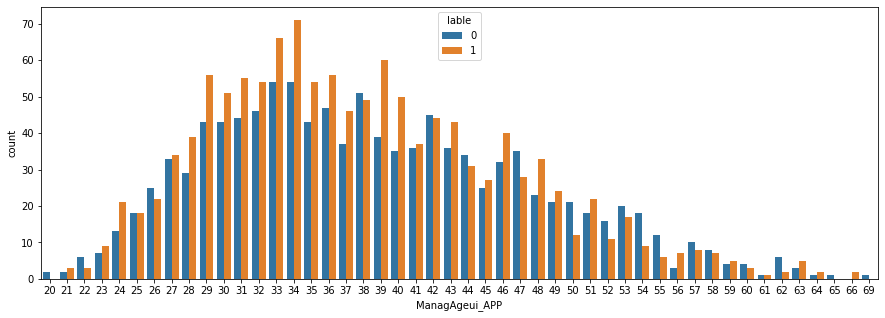

In [ ]:
#count the age who got the loan sanction or not
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'ManagAgeui_APP', hue = 'lable')

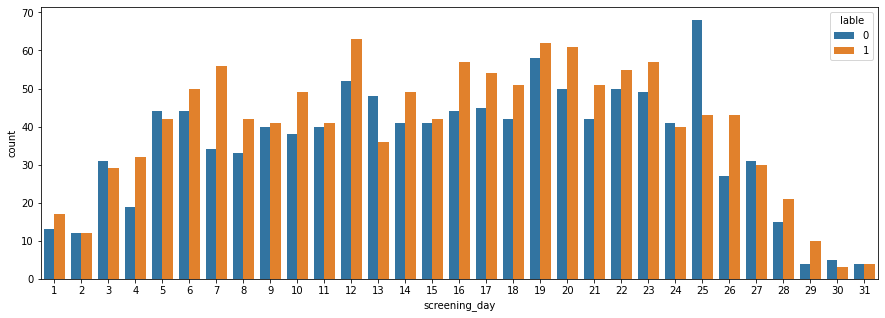

In [ ]:
#make a count plot for the screening day or the label(loan sanction)
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'screening_day', hue = 'lable')

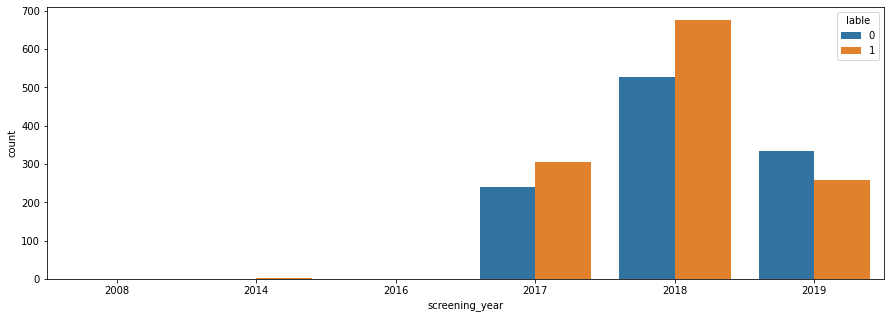

In [ ]:
#make a count plot which represent which year has more loan application filled
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'screening_year', hue = 'lable')

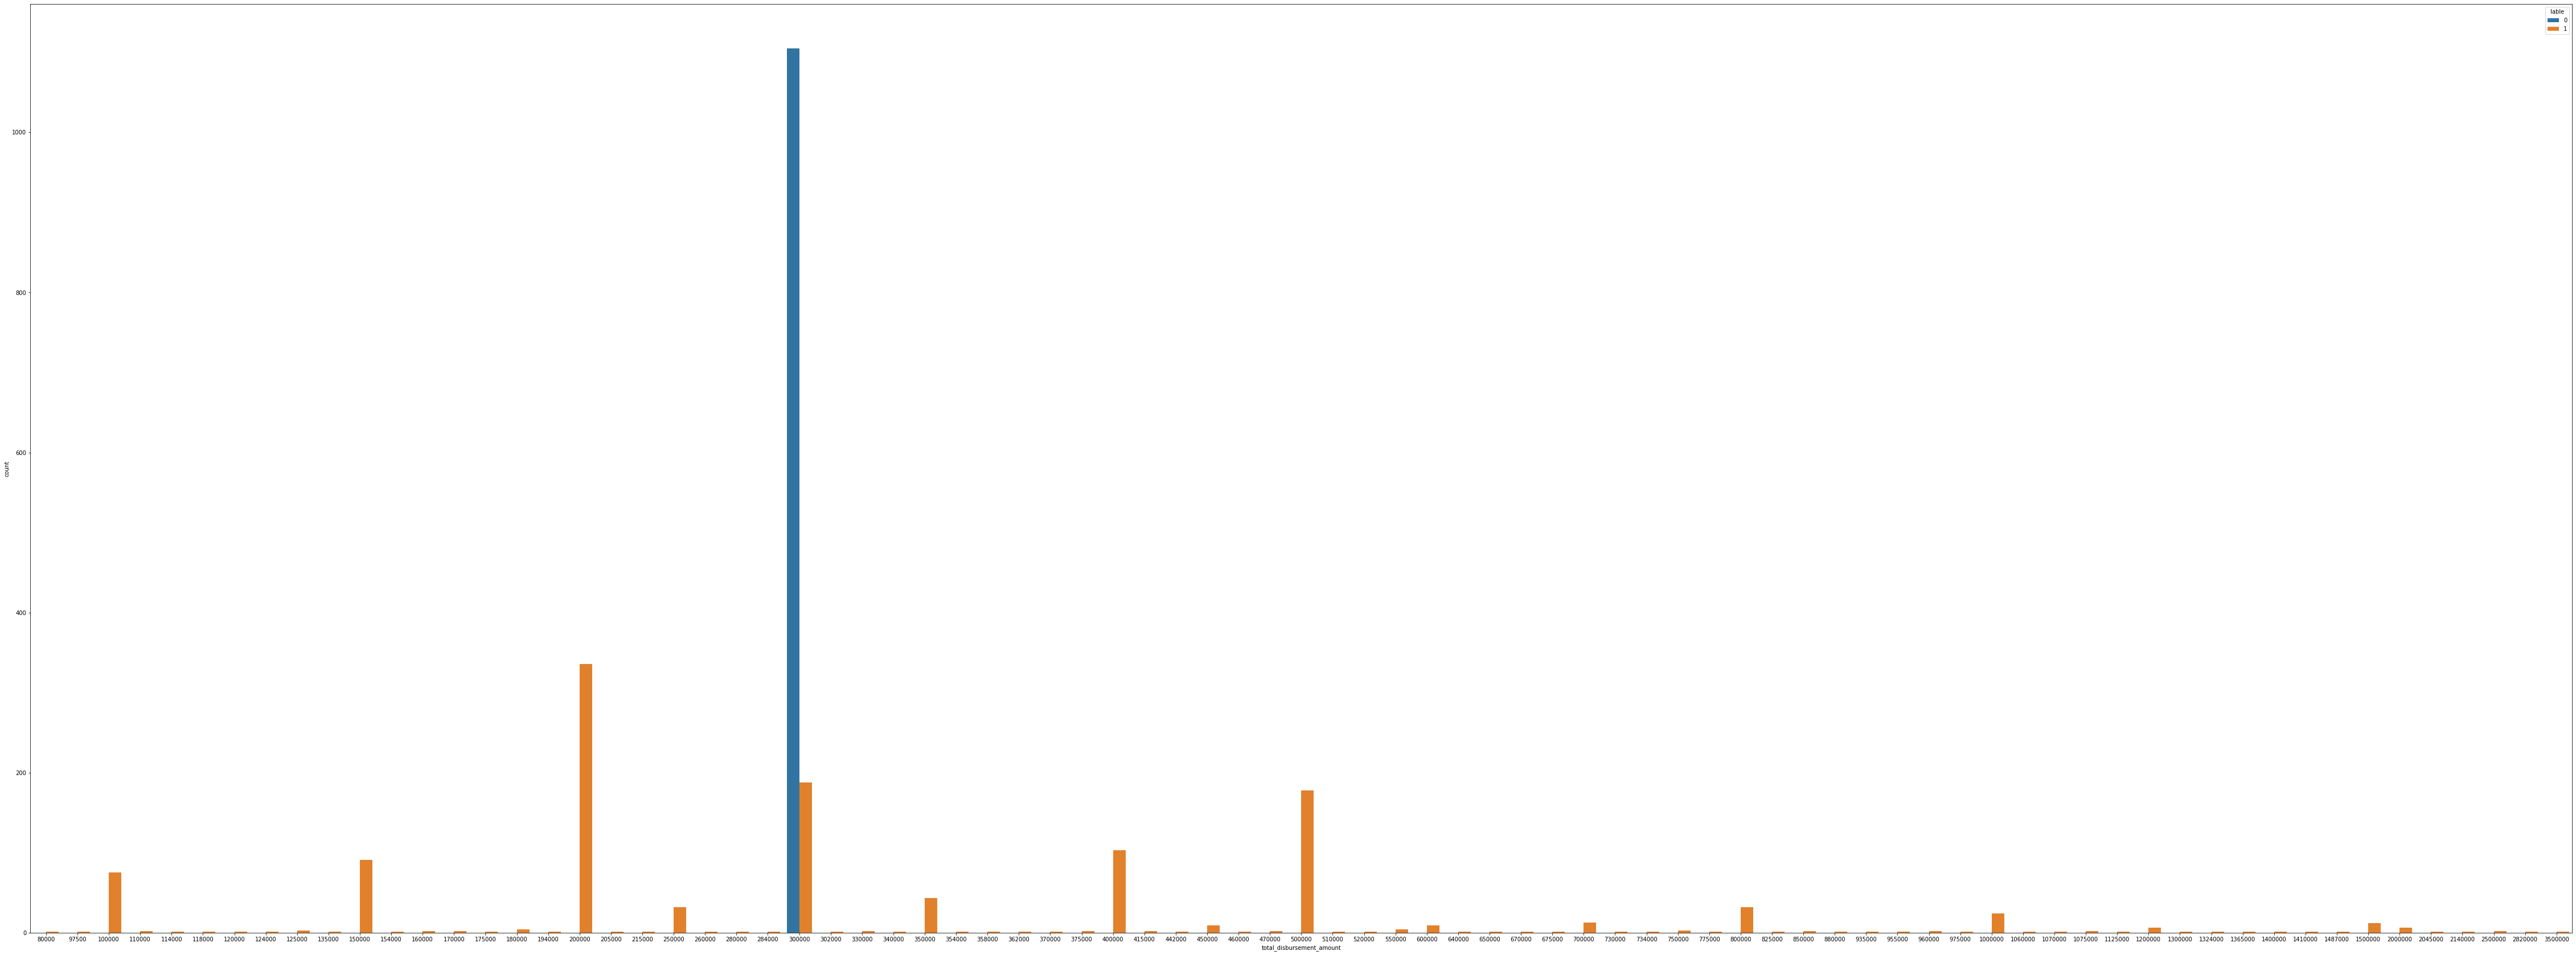

In [ ]:
# make a count plot which show the total amount sanction or not
plt.figure(figsize=(80,30))
sns.countplot(data = result, x = 'total_disbursement_amount', hue = 'lable')

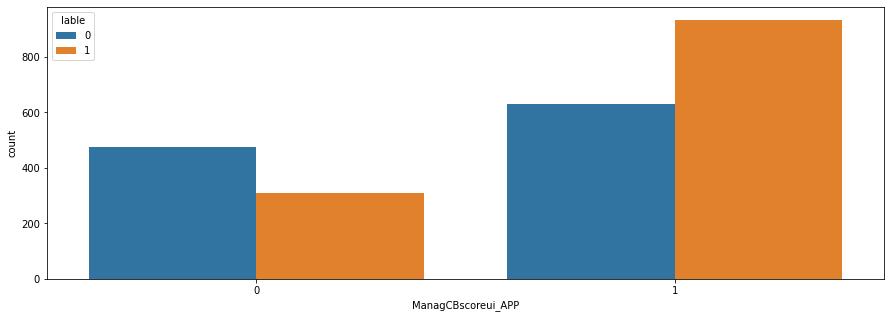

In [ ]:
#make a count plot wahuch represent the count the of cibil score and lable
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'ManagCBscoreui_APP', hue = 'lable')

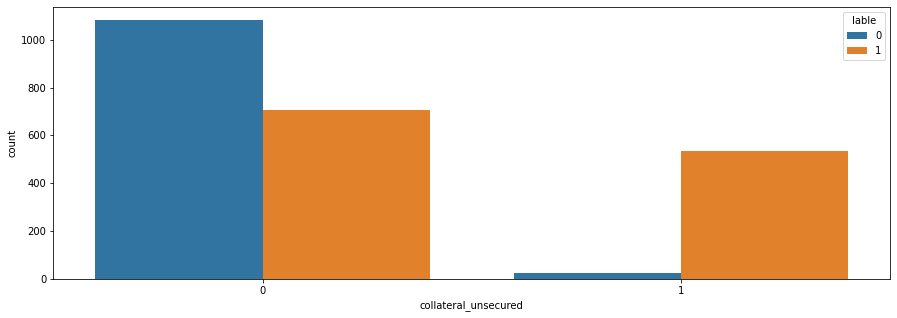

In [ ]:
#make a count in which how many loan sanction without collateral
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'collateral_unsecured', hue = 'lable')

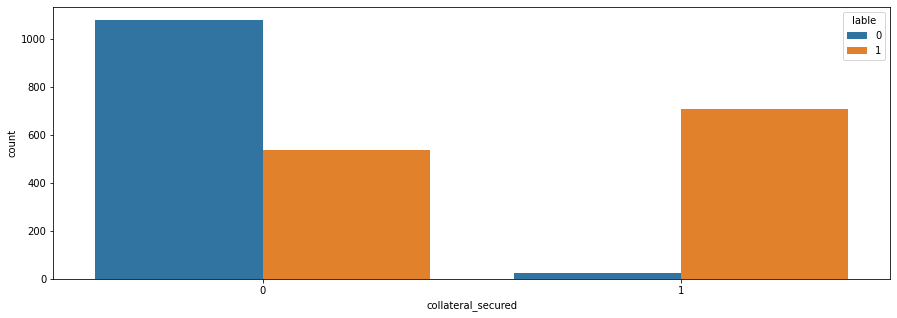

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data = result, x = 'collateral_secured', hue = 'lable')

**Heat map for ckeck the correlation between the features**

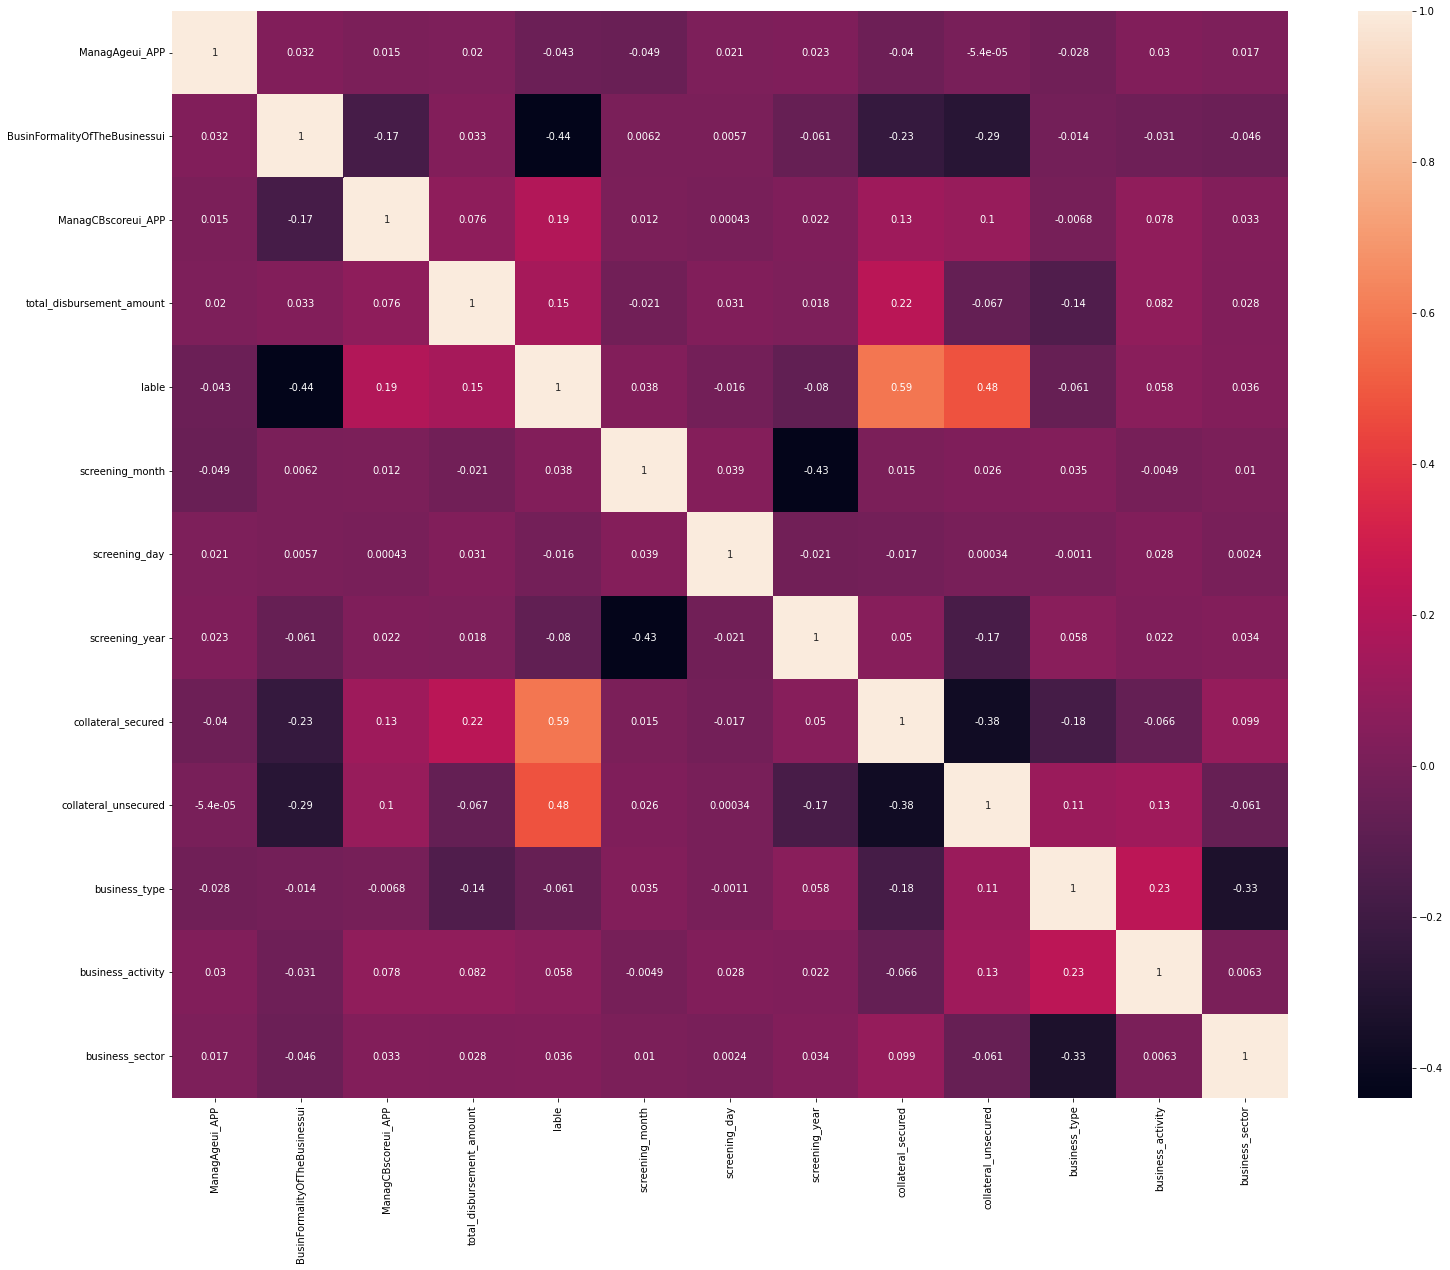

In [ ]:
# plot aheat map to check the correlation between the features
plt.figure(figsize=(25,20))
sns.heatmap(result.corr(),annot=True)
plt.show()

**Model Training**

Train Test split for regression
Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
 #Assign the value in X and Y
X =result.drop('lable',axis=1)
y = result['lable']

In [ ]:
# Train test split for the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

1    52.938671
0    47.061329
Name: lable, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


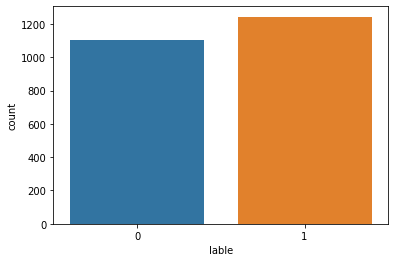

In [ ]:
#shaop of the labe so our target variable(lable ) is balanced
print((result['lable'].value_counts()/result['lable'].shape)*100)
sns.countplot(result['lable'])
plt.show()

**MODELLING**

**Model using LogisticRegression:**

In [ ]:
#import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic = LogisticRegression(random_state = 42)
# fit the x_train and y_train
logistic.fit(X_train, y_train)
#predict the model x_test
y_pred = logistic.predict(X_test)
# find accuracy score
acc_1=accuracy_score(y_test, y_pred)
#find the accuracy of the model 
accuracy1=round(acc_1*100,2)
cm = confusion_matrix(y_test, y_pred)
# print the confusion matrix
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[207 135]
 [ 94 269]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#print classification report
print(classification_report(y_test,y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

           0       0.69      0.61      0.64       342
           1       0.67      0.74      0.70       363

    accuracy                           0.68       705
   macro avg       0.68      0.67      0.67       705
weighted avg       0.68      0.68      0.67       705

The accuracy score of logistic regression is 67.52%


not a good precision value

**k nearest neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# fit the model
k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train,y_train)
#predict the x_train 
y_pred2 = k_neighbors.predict(X_test)
#check the accuracy score of y_test,y_pred
acc_2 = accuracy_score(y_test, y_pred2)
accuracy2=round(acc_2*100,2)
#print classification report
print(classification_report(y_test,y_pred))
print('The accuracy score of k nearest neighbors is {}%'.format(accuracy2))

              precision    recall  f1-score   support

           0       0.69      0.61      0.64       342
           1       0.67      0.74      0.70       363

    accuracy                           0.68       705
   macro avg       0.68      0.67      0.67       705
weighted avg       0.68      0.68      0.67       705

The accuracy score of k nearest neighbors is 92.2%


Precision value is not good

**Naive bayes**

In [ ]:
#import the libraries
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
# fit the x_train and y_train
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#check the accuracy score
acc3=metrics.accuracy_score(y_test, y_pred)
#print the accuracy score 
accuracy3=round(acc3*100,2)
print(classification_report(y_test,y_pred))

print("Gaussian Naive Bayes model accuracy is {}%".format(accuracy3))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       342
           1       1.00      0.87      0.93       363

    accuracy                           0.93       705
   macro avg       0.94      0.93      0.93       705
weighted avg       0.94      0.93      0.93       705

Gaussian Naive Bayes model accuracy is 93.19%


Precision value is good

In [ ]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
#fit x_train and y_train
decision_tree.fit(X_train,y_train)
#predict xtest
y_pred4 = decision_tree.predict(X_test)
#check accuracy score
acc_4 = accuracy_score(y_test, y_pred4)
#find the score
score4 = round(acc_4*100,2)
#print classification report
print(classification_report(y_test,y_pred))

print('The accuracy score of Decision tree is {}%'.format(score4))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       342
           1       1.00      0.87      0.93       363

    accuracy                           0.93       705
   macro avg       0.94      0.93      0.93       705
weighted avg       0.94      0.93      0.93       705

The accuracy score of Decision tree is 97.02%


In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
# fit our model in x_train and y_train
random_forest.fit(X_train, y_train)
#predict x_tarin
ran = random_forest.predict(X_train)
#predict x_test
y_pred5 = random_forest.predict(X_test)
#check the accuracy score
acc_5 = accuracy_score(y_test, y_pred5)
# now print the round 
score5 = round(acc_5*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score5))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       342
           1       1.00      0.87      0.93       363

    accuracy                           0.93       705
   macro avg       0.94      0.93      0.93       705
weighted avg       0.94      0.93      0.93       705

The accuracy score of random forest is 97.73%


In [ ]:
#Train the XGboost Model for Classification
import xgboost as xgb
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
# fit the model in x_train and y_train
train_model1 = model1.fit(X_train, y_train)
train_model2 = model2.fit(X_train, y_train)

In [ ]:
#classification report for the model
from sklearn.metrics import classification_report
#predict the x_teat and y_teat
pred1 = train_model1.predict(X_test)
pred2 = train_model2.predict(X_test)
#print the classification report
print(classification_report(y_test, pred1))
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       342
           1       0.96      1.00      0.98       363

    accuracy                           0.98       705
   macro avg       0.98      0.98      0.98       705
weighted avg       0.98      0.98      0.98       705

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       342
           1       0.96      1.00      0.98       363

    accuracy                           0.98       705
   macro avg       0.98      0.98      0.98       705
weighted avg       0.98      0.98      0.98       705



# **CONCLUSION**

1.I Implemented three classification algorithms on this dataset such as logistic regression KNN. Gaussian Naïve Bayes Decision Tree Random Forest XG Boost

2.I check the accuracy of the model but most I focus on the precision value of the model because precision value plays most important role in lending company so more is precision more the model is correct.

3.So XG Boost gave the maximum precision value so this model is best for this dataset.

4 I can conclude from this data set that the maximum number of loan sanction of those customers whose age lies between 30 to 40

5 Business type mostly manufacturing and trading

6 Maximum number of loan cancelled of those customers whose age below 24 and above 50.

7.Out of total applicant 42% application cancelled

8 Average amount disbursed to the customers is 337857.11

9.Very few customers get the loan amount above 500000.

10.Those customer whose CIBIL score below 650 has less chances to sanction the loan and above the 650 chances of loan sanction increase

